In [220]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

wine = pd.read_csv('C:\Machine Learning\flavors_of_cacao.csv')



FileNotFoundError: File b'C:\\Machine Learning\x0clavors_of_cacao.csv' does not exist

In [40]:
wine.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34


In [41]:
bins = (17, 55 , 94)
group_names = ['bad', 'good']
wine['rating'] = pd.cut(wine['rating'], bins = bins, labels = group_names)



In [42]:
wine = wine.drop('name',axis=1)


In [43]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 15 columns):
mfr         77 non-null object
type        77 non-null object
calories    77 non-null int64
protein     77 non-null int64
fat         77 non-null int64
sodium      77 non-null int64
fiber       77 non-null float64
carbo       77 non-null float64
sugars      77 non-null int64
potass      77 non-null int64
vitamins    77 non-null int64
shelf       77 non-null int64
weight      77 non-null float64
cups        77 non-null float64
rating      77 non-null category
dtypes: category(1), float64(4), int64(8), object(2)
memory usage: 8.0+ KB


In [44]:
wine = wine.drop('type',axis=1)

In [54]:
wine.head()
wine =wine.drop('mfr',axis=1)

In [55]:
label_quality = LabelEncoder()
wine['rating'] = label_quality.fit_transform(wine['rating'])
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75 entries, 0 to 74
Data columns (total 13 columns):
calories    75 non-null int64
protein     75 non-null int64
fat         75 non-null int64
sodium      75 non-null int64
fiber       75 non-null float64
carbo       75 non-null float64
sugars      75 non-null int64
potass      75 non-null int64
vitamins    75 non-null int64
shelf       75 non-null int64
weight      75 non-null float64
cups        75 non-null float64
rating      75 non-null int32
dtypes: float64(4), int32(1), int64(8)
memory usage: 7.4 KB


In [56]:
y = wine['rating']
X = wine.drop('rating', axis = 1)


In [212]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 18)


In [213]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)


In [214]:
from sklearn.naive_bayes import BernoulliNB
dt = BernoulliNB()
dt.fit(X_train, y_train)
pred_dt = dt.predict(X_test)


In [215]:
print(classification_report(y_test, pred_dt))
cf=confusion_matrix(y_test, pred_dt)
print(cf)

             precision    recall  f1-score   support

          0       1.00      0.84      0.91        19
          1       0.57      1.00      0.73         4

avg / total       0.93      0.87      0.88        23

[[16  3]
 [ 0  4]]


In [216]:
y_score = dt.fit(X_train, y_train).predict_proba(X_test)


In [217]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
fpr, tpr, _ = roc_curve(y_test, y_score[:,1])
roc_auc = auc(fpr, tpr)

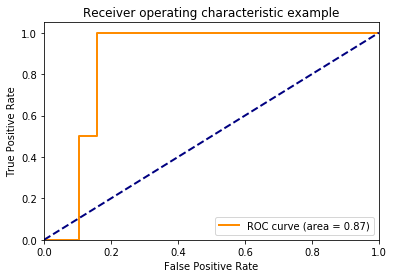

In [218]:
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()